# 설치

In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 코랩에서 한글 폰트를 사용하기 위한 설치과정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 리뷰 데이터 불러오기



> 매 런타임마다 불러올 필요없이 바로 로드가능한 방법이 있을까?

In [3]:
# 로컬 데이터 로드

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

df = pd.read_excel('OneamSparkling_652_Danawa_crawling.xlsx')
df.head()

,Review
0,원에이엠 탄산수 처음구매했어요닭가슴살 소세지에 사은품으로 온 사과맛을 한번 맛본후 ...
1,맥주를 너무 자주 마셔 대체재를 찾다 일반 탄산수보다는 나을것 같아 처음 구입해 봤...
2,우연히 보게되여 상품평 보고 구매했는데 일반적인 탄산수와는 다르네요 정말 달달하고 ...
3,제품은 모든면에서 만족해요.하지만 포장은 정말 엉망이네요.먹는 음료수인데 포장이 한...
4,제가 마셔본 탄산수 중 최고입니다. 라임맛 스파클링은 그냥 탄산 음료같이 맛있습니다...


In [4]:
df.info()

for i in range(0, 10):
  print(str(i), df['Review'][i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  654 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB
0 원에이엠 탄산수 처음구매했어요닭가슴살 소세지에 사은품으로 온 사과맛을 한번 맛본후 와~~탄산수가 이렇게 맛있다고? 를 연발하며 쿠팡과 g마켓  네이버쇼핑에 검색질후 후기를보는데내가 맛본 사과맛는 별루 안사고 라임맛을 엄청 많이샀길래 들어가보니 맛또한 제일맛있다고 칭찬일색이어서 어서어서 결재하자 빨리사서 매일 하나씩 먹을생각에 신이났습니다. 배송도 8시전이면 다음날도착이라 좋다고 샀는데. ?? 이게 맛있는거에요? 입맛들이 다 제각각 이라지만 진정 이게 맛있다라는 그많은사람들은 진짜 여지껏 다이어트빡시게하면서 맛있는걸 진정 맛보지않은 저질입맛들인가..했어요 이게 맛있다니..이게 맛있다니... 티그램만 잡순건가.. 그거는정말 저세상 탄산수이고 이걸 내가 돈주고 왜샀나 싶어 음료에 섞어먹었는데.  이것도 약간 끝맛이 미원 한꼬집먹은맛. 첨부터 애플맛에 반했으면 애플맛을 사지 노메 입맛에 속아서ㅋ 저많은걸 언제 다먹을란지.에휴~~애플맛이 제일 나음.
1 맥주를 너무 자주 마셔 대체재를 찾다 일반 탄산수보다는 나을것 같아 처음 구입해 봤습니다. 당도가 있어서 일반 탄산수보단 마시기는 좋지만 탄산이 너무 약해 맥주만큼의 청량감이 느껴지지 않습니다.  김빠진 사이다맛? 그리고 300ml 병당 천원이면 상당히 비용적으로 부담이 되는 가격 같아요. 다음엔 똑같이 칼로리, 당류 0%면서 가격이 50% 수준인 펩시 제로콜라나 제로사이다 한번 마셔보려고 합니다.사악한 가격과 낮은 탄산 원에이엠 재구매 가능성 0%
2 우연히 보게되여 상품

# 전처리

1. Text Cleaning

> 한글, 영어, 숫자 남기기 적용
> 띄어쓰기 적용해야할까? pykospacing



In [5]:
import re

def cleaned_text(text): 
  hangul = re.compile('[^가-힇a-zA-Z0-9]')
  result = hangul.sub(' ', text)
  return result

df['Review'] = df['Review'].apply(lambda x: cleaned_text(x))

In [6]:
print(df['Review'])

0      원에이엠 탄산수 처음구매했어요닭가슴살 소세지에 사은품으로 온 사과맛을 한번 맛본후 ...
1      맥주를 너무 자주 마셔 대체재를 찾다 일반 탄산수보다는 나을것 같아 처음 구입해 봤...
2      우연  보게되여 상품평 보고 구매했는데 일반적인 탄산수와는 다르네요 정말 달달하고 ...
3      제품은 모든면에서 만족해요 하지만 포장은 정말 엉망이네요 먹는 음료수인데 포장이 한...
4      제가 마셔본 탄산수 중 최고입니다  라임맛 스파클링은 그냥 탄산 음료같이 맛있습니다...
                             ...                        
649       다른 음료보다 많이 단거 같지 않고 탄산도 강한편이 아니라 애들 먹기 좋은거 같아요
650             1박스 시켰는데 이게 뭐예요 달랑 1병이 왔는데 기가차서 말이 안나오네요
651                                          좋아요마음에들어요추천
652                                        맛잇네요 배송이좀느렷어요
653                                시원하게 마시니 좋네요  잘 마실게요 
Name: Review, Length: 654, dtype: object


2. Tokenization & POS tagging
> 사전에 사전 작업을 해줘야할 것 같음

In [7]:
import os

os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java')
os.getcwd() 
os.makedirs('./aaa')

FileExistsError: ignored

In [9]:
os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java/aaa')
!jar xvf ../open-korean-text-2.1.0.jar

In [10]:
!jar cvf ../open-korean-text-2.1.0.jar * 

added manifest
ignoring entry META-INF/
ignoring entry META-INF/MANIFEST.MF
adding: META-INF/maven/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.xml(in = 9127) (out= 2208)(deflated 75%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.properties(in = 119) (out= 110)(deflated 7%)
adding: org/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/tools/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/tools/Runnable.class(in = 964) (out= 694)(deflated 28%)
adding: org/openkoreantext/processor/tools/CreateParsingExamples.class(in = 2427) (out= 1732)(deflated 28%)
adding: org/openkoreantext/processor/tools/CreatePhraseExtraction

In [11]:
reviews = []

for i in range(len(df['Review'])):
  reviews.append(df['Review'][i])

print(len(reviews))
reviews[:10]

654


['원에이엠 탄산수 처음구매했어요닭가슴살 소세지에 사은품으로 온 사과맛을 한번 맛본후 와  탄산수가 이렇게 맛있다고  를 연발하며 쿠팡과 g마켓  네이버쇼핑에 검색질후 후기를보는데내가 맛본 사과맛는 별루 안사고 라임맛을 엄청 많이샀길래 들어가보니 맛또한 제일맛있다고 칭찬일색이어서 어서어서 결재하자 빨리사서 매일 하나씩 먹을생각에 신이났습니다  배송도 8시전이면 다음날도착이라 좋다고 샀는데     이게 맛있는거에요  입맛들이 다 제각각 이라지만 진정 이게 맛있다라는 그많은사람들은 진짜 여지껏 다이어트빡시게하면서 맛있는걸 진정 맛보지않은 저질입맛들인가  했어요 이게 맛있다니  이게 맛있다니    티그램만 잡순건가   그거는정말 저세상 탄산수이고 이걸 내가 돈주고 왜샀나 싶어 음료에 섞어먹었는데   이것도 약간 끝맛이 미원 한꼬집먹은맛  첨부터 애플맛에 반했으면 애플맛을 사지 노메 입맛에 속아서  저많은걸 언제 다먹을란지 에휴  애플맛이 제일 나음 ',
 '맥주를 너무 자주 마셔 대체재를 찾다 일반 탄산수보다는 나을것 같아 처음 구입해 봤습니다  당도가 있어서 일반 탄산수보단 마시기는 좋지만 탄산이 너무 약해 맥주만큼의 청량감이 느껴지지 않습니다   김빠진 사이다맛  그리고 300ml 병당 천원이면 상당  비용적으로 부담이 되는 가격 같아요  다음엔 똑같이 칼로리  당류 0 면서 가격이 50  수준인 펩시 제로콜라나 제로사이다 한번 마셔보려고 합니다 사악한 가격과 낮은 탄산 원에이엠 재구매 가능성 0 ',
 '우연  보게되여 상품평 보고 구매했는데 일반적인 탄산수와는 다르네요 정말 달달하고 탄산도 있구 칼로리는 제로라니 최고인듯하네요   근데 저는 탄산 쎈걸 좋아해서 그런지 탄산이 살짝 아쉽긴 하지만 콜라 사이다 대용 또는 음료 대신으로 좋을것 같아요  가격이 비싼것 빼구요  가격좀 내려주세요  ',
 '제품은 모든면에서 만족해요 하지만 포장은 정말 엉망이네요 먹는 음료수인데 포장이 한쪽은 완전  어져서 음료병이 빠져서 왔드라고요 찜찜하게 먼저번에는 두개를 시켰는데

In [12]:
from konlpy.tag import Okt
okt = Okt()

NN_words = []

for review in reviews:
  okt_pos = okt.pos(review)

  for word, pos in okt_pos:
    if 'Noun' in pos :
      NN_words.append(word)

NN_words

# 2668개 단어

['원에이엠',
 '탄산수',
 '처음',
 '구매',
 '닭',
 '가슴',
 '살',
 '소세지',
 '사은품',
 '온',
 '사과',
 '맛',
 '한번',
 '후',
 '탄산수',
 '를',
 '연발',
 '쿠팡',
 '마켓',
 '네이버',
 '쇼핑',
 '검색',
 '질후',
 '후기',
 '사과',
 '맛',
 '별루',
 '라임맛',
 '맛',
 '또한',
 '제일',
 '칭찬',
 '일색',
 '어서어서',
 '결재',
 '사서',
 '매일',
 '하나',
 '생각',
 '신',
 '배송',
 '다음',
 '날',
 '도착',
 '이',
 '입맛',
 '제각각',
 '진정',
 '이',
 '그',
 '사람',
 '진짜',
 '여지',
 '껏',
 '다이어트',
 '진정',
 '질',
 '입맛',
 '이',
 '이',
 '티',
 '그램',
 '건가',
 '그거',
 '정말',
 '세상',
 '탄산수',
 '걸',
 '내',
 '돈',
 '왜',
 '음료',
 '것',
 '약간',
 '끝맛',
 '미원',
 '맛',
 '첨부',
 '터',
 '애플맛',
 '애플맛',
 '사지',
 '노메',
 '입맛',
 '속',
 '저',
 '언제',
 '란',
 '애플맛',
 '제일',
 '맥주',
 '자주',
 '대체재',
 '일반',
 '탄산수',
 '처음',
 '구입',
 '도',
 '일반',
 '탄산수',
 '마시기',
 '탄산',
 '맥주',
 '청량감',
 '김',
 '사이다',
 '맛',
 '병',
 '천원',
 '이면',
 '상당',
 '비용',
 '부담',
 '가격',
 '다음',
 '칼로리',
 '당류',
 '면서',
 '가격',
 '수준',
 '펩시',
 '제로',
 '콜라',
 '제로',
 '사이다',
 '한번',
 '가격',
 '탄산',
 '원에이엠',
 '가능성',
 '우연',
 '여',
 '상품',
 '평',
 '보고',
 '구매',
 '일반',
 '탄산수',
 '정말',
 '달달',
 '탄산',
 '칼로리',
 '제로',
 '최

3. Stopwords 제거
> 사전 작업
> 불용어 고민이 필요함

In [16]:
customized_stopwords = ['요', '더', '때', '것', '진짜', '이', '정말']

unique_NN_words = set(NN_words)

for word in unique_NN_words :
  if word in customized_stopwords:
    while word in NN_words: NN_words.remove(word)

# Sematic Network 형성

1. 단어의 빈도 파악

In [17]:
from collections import Counter

c = Counter(NN_words)
print(c.most_common(20))

list_of_words = []

for word, count in c.most_common(50):
  list_of_words.append(word)

[('배송', 148), ('맛', 123), ('탄산수', 103), ('칼로리', 77), ('구매', 76), ('가격', 49), ('주문', 41), ('탄산', 38), ('제로', 36), ('스파클링', 34), ('라임', 34), ('음료', 24), ('다른', 24), ('보고', 23), ('제품', 22), ('원에이엠', 20), ('구입', 19), ('상품', 19), ('애플맛', 18), ('사은품', 17)]


2. 원본 텍스트 쪼개기
> reviews가 쪼개진 원본 텍스트임

In [18]:
reviews

['원에이엠 탄산수 처음구매했어요닭가슴살 소세지에 사은품으로 온 사과맛을 한번 맛본후 와  탄산수가 이렇게 맛있다고  를 연발하며 쿠팡과 g마켓  네이버쇼핑에 검색질후 후기를보는데내가 맛본 사과맛는 별루 안사고 라임맛을 엄청 많이샀길래 들어가보니 맛또한 제일맛있다고 칭찬일색이어서 어서어서 결재하자 빨리사서 매일 하나씩 먹을생각에 신이났습니다  배송도 8시전이면 다음날도착이라 좋다고 샀는데     이게 맛있는거에요  입맛들이 다 제각각 이라지만 진정 이게 맛있다라는 그많은사람들은 진짜 여지껏 다이어트빡시게하면서 맛있는걸 진정 맛보지않은 저질입맛들인가  했어요 이게 맛있다니  이게 맛있다니    티그램만 잡순건가   그거는정말 저세상 탄산수이고 이걸 내가 돈주고 왜샀나 싶어 음료에 섞어먹었는데   이것도 약간 끝맛이 미원 한꼬집먹은맛  첨부터 애플맛에 반했으면 애플맛을 사지 노메 입맛에 속아서  저많은걸 언제 다먹을란지 에휴  애플맛이 제일 나음 ',
 '맥주를 너무 자주 마셔 대체재를 찾다 일반 탄산수보다는 나을것 같아 처음 구입해 봤습니다  당도가 있어서 일반 탄산수보단 마시기는 좋지만 탄산이 너무 약해 맥주만큼의 청량감이 느껴지지 않습니다   김빠진 사이다맛  그리고 300ml 병당 천원이면 상당  비용적으로 부담이 되는 가격 같아요  다음엔 똑같이 칼로리  당류 0 면서 가격이 50  수준인 펩시 제로콜라나 제로사이다 한번 마셔보려고 합니다 사악한 가격과 낮은 탄산 원에이엠 재구매 가능성 0 ',
 '우연  보게되여 상품평 보고 구매했는데 일반적인 탄산수와는 다르네요 정말 달달하고 탄산도 있구 칼로리는 제로라니 최고인듯하네요   근데 저는 탄산 쎈걸 좋아해서 그런지 탄산이 살짝 아쉽긴 하지만 콜라 사이다 대용 또는 음료 대신으로 좋을것 같아요  가격이 비싼것 빼구요  가격좀 내려주세요  ',
 '제품은 모든면에서 만족해요 하지만 포장은 정말 엉망이네요 먹는 음료수인데 포장이 한쪽은 완전  어져서 음료병이 빠져서 왔드라고요 찜찜하게 먼저번에는 두개를 시켰는데

3. 단어들을 node로 생성

In [19]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(list_of_words)

print(G.nodes())
print(G.edges())

['배송', '맛', '탄산수', '칼로리', '구매', '가격', '주문', '탄산', '제로', '스파클링', '라임', '음료', '다른', '보고', '제품', '원에이엠', '구입', '상품', '애플맛', '사은품', '라임맛', '제일', '탄산음료', '또', '사이다', '굿', '병', '최고', '대신', '좀', '거', '먹기', '항상', '부담', '포장', '중', '쿠폰', '늘', '저', '마시기', '달달', '아주', '콜라', '단맛', '할인', '바로', '서비스', '상큼', '한번', '다음']
[]


4. edge(=tie) 만들기

In [20]:
import itertools

for review in reviews :

  selected_words = []
  NN_words = []

  okt_pos = okt.pos(review)

  for word, pos in okt_pos :
    if 'Noun' in pos:
      NN_words.append(word)

  for word in NN_words :
    if word in list_of_words:
      selected_words.append(word)

  selected_words = set(selected_words)

  for pair in list(itertools.combinations(list(selected_words), 2)):
    if pair in G.edges():
      weight = G[pair[0]][pair[1]]['weight']
      weight += 1
      G[pair[0]][pair[1]]['weight'] = weight    
    else:         
      G.add_edge(pair[0], pair[1], weight=1 )
            
 # 생성된 edge 확인해보기
print(nx.get_edge_attributes(G, 'weight'))

{('배송', '라임맛'): 2, ('배송', '맛'): 18, ('배송', '저'): 3, ('배송', '제일'): 2, ('배송', '음료'): 3, ('배송', '탄산수'): 13, ('배송', '한번'): 2, ('배송', '다음'): 4, ('배송', '애플맛'): 2, ('배송', '사은품'): 2, ('배송', '구매'): 10, ('배송', '원에이엠'): 4, ('배송', '칼로리'): 7, ('배송', '탄산음료'): 2, ('배송', '라임'): 5, ('배송', '가격'): 6, ('배송', '제품'): 6, ('배송', '대신'): 2, ('배송', '주문'): 6, ('배송', '사이다'): 2, ('배송', '스파클링'): 2, ('배송', '먹기'): 3, ('배송', '보고'): 3, ('배송', '포장'): 4, ('배송', '굿'): 1, ('배송', '단맛'): 1, ('배송', '탄산'): 1, ('배송', '바로'): 5, ('배송', '상품'): 8, ('배송', '중'): 2, ('배송', '다른'): 2, ('배송', '병'): 3, ('배송', '좀'): 3, ('배송', '콜라'): 1, ('배송', '또'): 1, ('배송', '구입'): 1, ('배송', '항상'): 1, ('맛', '라임맛'): 4, ('맛', '저'): 4, ('맛', '제일'): 8, ('맛', '음료'): 5, ('맛', '탄산수'): 29, ('맛', '한번'): 5, ('맛', '다음'): 8, ('맛', '애플맛'): 2, ('맛', '사은품'): 4, ('맛', '구매'): 13, ('맛', '원에이엠'): 6, ('맛', '칼로리'): 30, ('맛', '부담'): 7, ('맛', '구입'): 4, ('맛', '사이다'): 6, ('맛', '탄산'): 11, ('맛', '제로'): 8, ('맛', '콜라'): 3, ('맛', '병'): 2, ('맛', '마시기'): 3, ('맛', '가격'): 10, ('맛', '탄산음료'):

# 네트워크 시각화

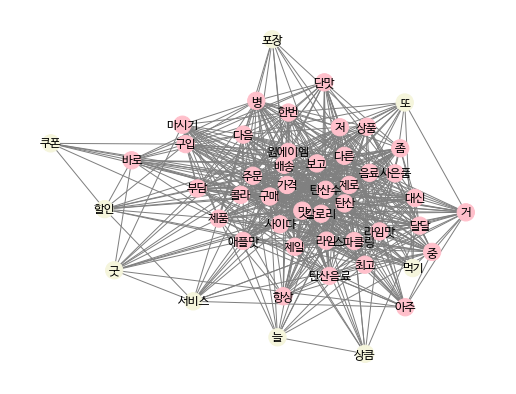

In [21]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

## 노드의 degree에 따라 color 다르게 설정하기
color_map = []
for node in G:
    if G.degree(node) >= 15:   # 중요한 노드 (degree가 15 이상)
        color_map.append('pink') 
    else: 
        color_map.append('beige')    

plt.figure(figsize=(9, 7))

pos = nx.spring_layout(G)  # spring layout 사용
nx.draw_networkx(G, pos, node_color=color_map, edge_color='grey', font_family='NanumBarunGothic')

plt.axis('off') # turn off axis 
plt.show()